In [ ]:
# Importing lIbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount("/content/drive")
import sys
sys.path.append('/content/drive/My Drive/')
import utils
import plot_utils
import nse_utils




Mounted at /content/drive


In [ ]:
# File paths
anto_file = ("/content/drive/MyDrive/Datasets/raw/raw/ANTO2_USGS.txt")
plvo_file = ("/content/drive/MyDrive/Datasets/raw/raw/PLVO2_USGS.txt")
anto_file_sim = ("/content/drive/MyDrive/Datasets/raw/raw/ANTO2_sim.txt")
plvo_file_sim = ("/content/drive/MyDrive/Datasets/raw/raw/PLVO2_sim.txt")

In [ ]:
# Read and preprocess the USGS data
df_anto = utils.read_usgs_data(anto_file, header_line=33)
df_plvo = utils.read_usgs_data(plvo_file, header_line=32)

# Read and preprocess simulation data
df_anto_sim = utils.read_simulation_data(anto_file_sim, header_line=6)
df_plvo_sim = utils.read_simulation_data(plvo_file_sim, header_line=6)


In [ ]:
df_anto.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality
212524,USGS,7336200,2007-01-01 00:00:00+00:00,CST,18400.0,A:[91]
212525,USGS,7336200,2007-01-01 01:00:00+00:00,CST,17600.0,A:[91]
212526,USGS,7336200,2007-01-01 02:00:00+00:00,CST,16800.0,A:[91]
212527,USGS,7336200,2007-01-01 03:00:00+00:00,CST,16000.0,A:[91]
212528,USGS,7336200,2007-01-01 04:00:00+00:00,CST,15200.0,A:[91]


In [ ]:
df_plvo.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality
134473,USGS,7328500,2007-01-01 00:00:00+00:00,CST,355.0,A:[91]
134474,USGS,7328500,2007-01-01 01:00:00+00:00,CST,355.0,A:[91]
134475,USGS,7328500,2007-01-01 02:00:00+00:00,CST,355.0,A:[91]
134476,USGS,7328500,2007-01-01 03:00:00+00:00,CST,355.0,A:[91]
134477,USGS,7328500,2007-01-01 04:00:00+00:00,CST,355.0,A:[91]


In [ ]:
df_anto_sim.head()

,datetime,Sim_Discharge
78314,2007-01-01 00:00:00-06:00,8404
78315,2007-01-01 06:00:00-06:00,7821
78316,2007-01-01 12:00:00-06:00,7006
78317,2007-01-01 18:00:00-06:00,6090
78318,2007-01-02 00:00:00-06:00,5257


In [ ]:
df_plvo_sim.head()

,datetime,Sim_Discharge
78314,2007-01-01 00:00:00-06:00,504
78315,2007-01-01 06:00:00-06:00,556
78316,2007-01-01 12:00:00-06:00,561
78317,2007-01-01 18:00:00-06:00,514
78318,2007-01-02 00:00:00-06:00,450


In [ ]:

# Merge df_plvo and df_plvo_sim
df_plvo_merged = pd.merge(df_plvo, df_plvo_sim, on='datetime', how='inner')


In [ ]:
# Replace "CST" with "UTC" in the 'timezone' column

df_plvo_merged['timezone'] = df_plvo_merged['timezone'].replace('CST', 'UTC')

# Display the modified DataFrame
print(df_plvo_merged.head())


    org  site_num                   datetime timezone  USGS_Discharge quality  \
0  USGS   7328500  2007-01-01 06:00:00+00:00      UTC           355.0  A:[91]   
1  USGS   7328500  2007-01-01 12:00:00+00:00      UTC           351.0  A:[91]   
2  USGS   7328500  2007-01-01 18:00:00+00:00      UTC           329.0  A:[91]   
3  USGS   7328500  2007-01-02 00:00:00+00:00      UTC           317.0  A:[91]   
4  USGS   7328500  2007-01-02 06:00:00+00:00      UTC           310.0  A:[91]   

   Sim_Discharge  
0            504  
1            556  
2            561  
3            514  
4            450  


In [ ]:
# Check for missing values in df_plvo_merged
missing_values_anto = df_plvo_merged.isnull().sum()

# Check for missing values in df_plvo_merged
missing_values_plvo = df_plvo_merged.isnull().sum()

# Print the number of missing values for each station
print("Number of missing values in df_plvo_merged:")
print(missing_values_anto)

print("\nNumber of missing values in df_plvo_merged:")
print(missing_values_plvo)


Number of missing values in df_plvo_merged:
org               0
site_num          0
datetime          0
timezone          0
USGS_Discharge    0
quality           0
Sim_Discharge     0
dtype: int64

Number of missing values in df_plvo_merged:
org               0
site_num          0
datetime          0
timezone          0
USGS_Discharge    0
quality           0
Sim_Discharge     0
dtype: int64


In [ ]:
df_plvo_merged.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
0,USGS,7328500,2007-01-01 06:00:00+00:00,UTC,355.0,A:[91],504
1,USGS,7328500,2007-01-01 12:00:00+00:00,UTC,351.0,A:[91],556
2,USGS,7328500,2007-01-01 18:00:00+00:00,UTC,329.0,A:[91],561
3,USGS,7328500,2007-01-02 00:00:00+00:00,UTC,317.0,A:[91],514
4,USGS,7328500,2007-01-02 06:00:00+00:00,UTC,310.0,A:[91],450


In [ ]:
df_plvo_merged.tail()

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
17402,USGS,7328500,2020-12-30 18:00:00+00:00,UTC,451.0,A:e,294
17403,USGS,7328500,2020-12-31 00:00:00+00:00,UTC,638.0,A:e,728
17404,USGS,7328500,2020-12-31 06:00:00+00:00,UTC,761.0,A:e,1175
17405,USGS,7328500,2020-12-31 12:00:00+00:00,UTC,959.0,A:e,1374
17406,USGS,7328500,2020-12-31 18:00:00+00:00,UTC,1220.0,A:e,1333


In [ ]:
# Convert 'datetime' column to datetime-like object
df_plvo_merged['datetime'] = pd.to_datetime(df_plvo_merged['datetime'])

# Filter the DataFrame for datetime values on "2007-01-01"
filtered_df = df_plvo_merged[df_plvo_merged['datetime'].dt.date == pd.to_datetime("2007-01-01")]

# Display the filtered DataFrame
print(filtered_df)


    org  site_num                  datetime timezone  USGS_Discharge quality  \
0  USGS   7328500 2007-01-01 06:00:00+00:00      UTC           355.0  A:[91]   
1  USGS   7328500 2007-01-01 12:00:00+00:00      UTC           351.0  A:[91]   
2  USGS   7328500 2007-01-01 18:00:00+00:00      UTC           329.0  A:[91]   

   Sim_Discharge  
0            504  
1            556  
2            561  


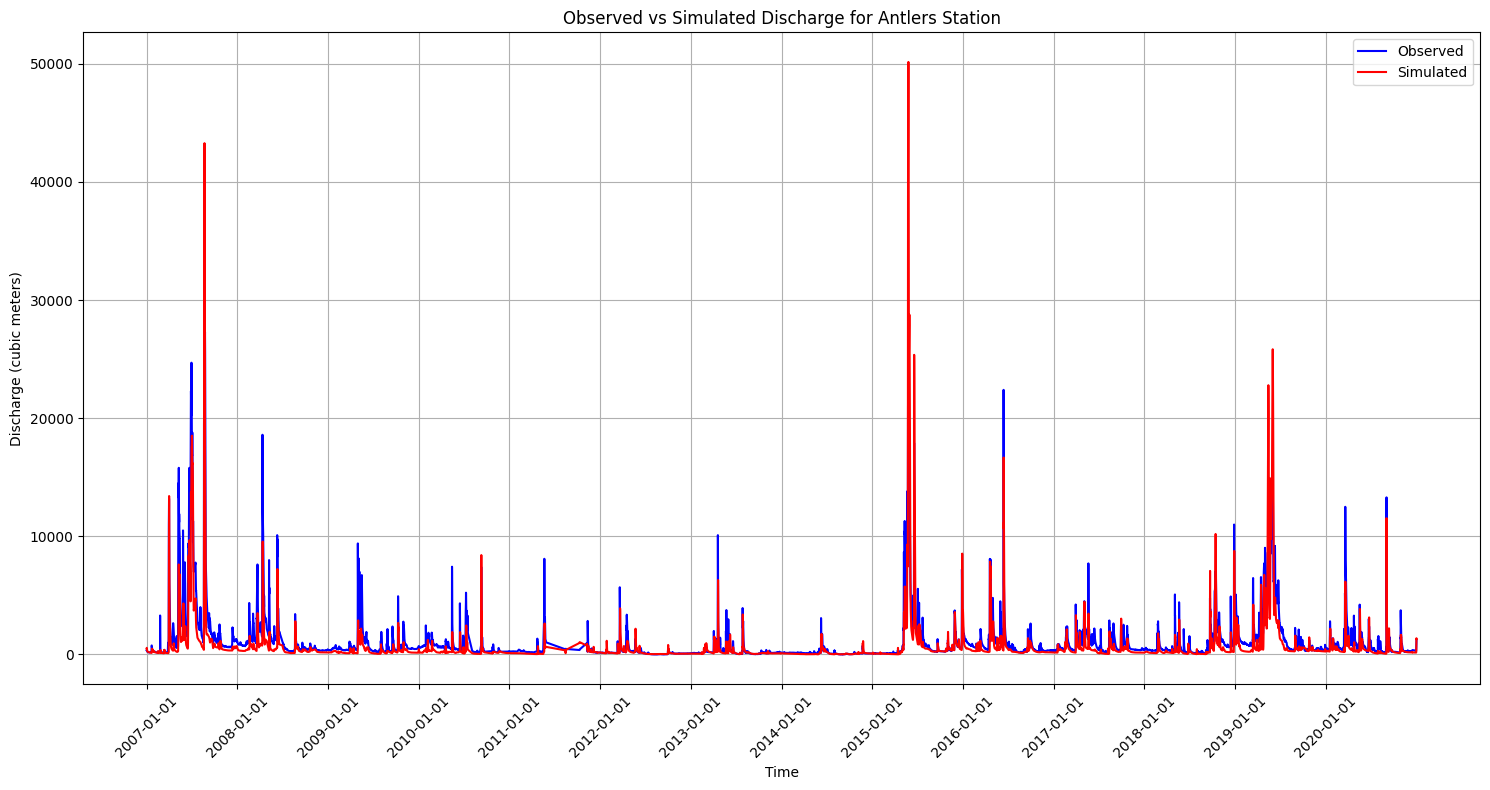

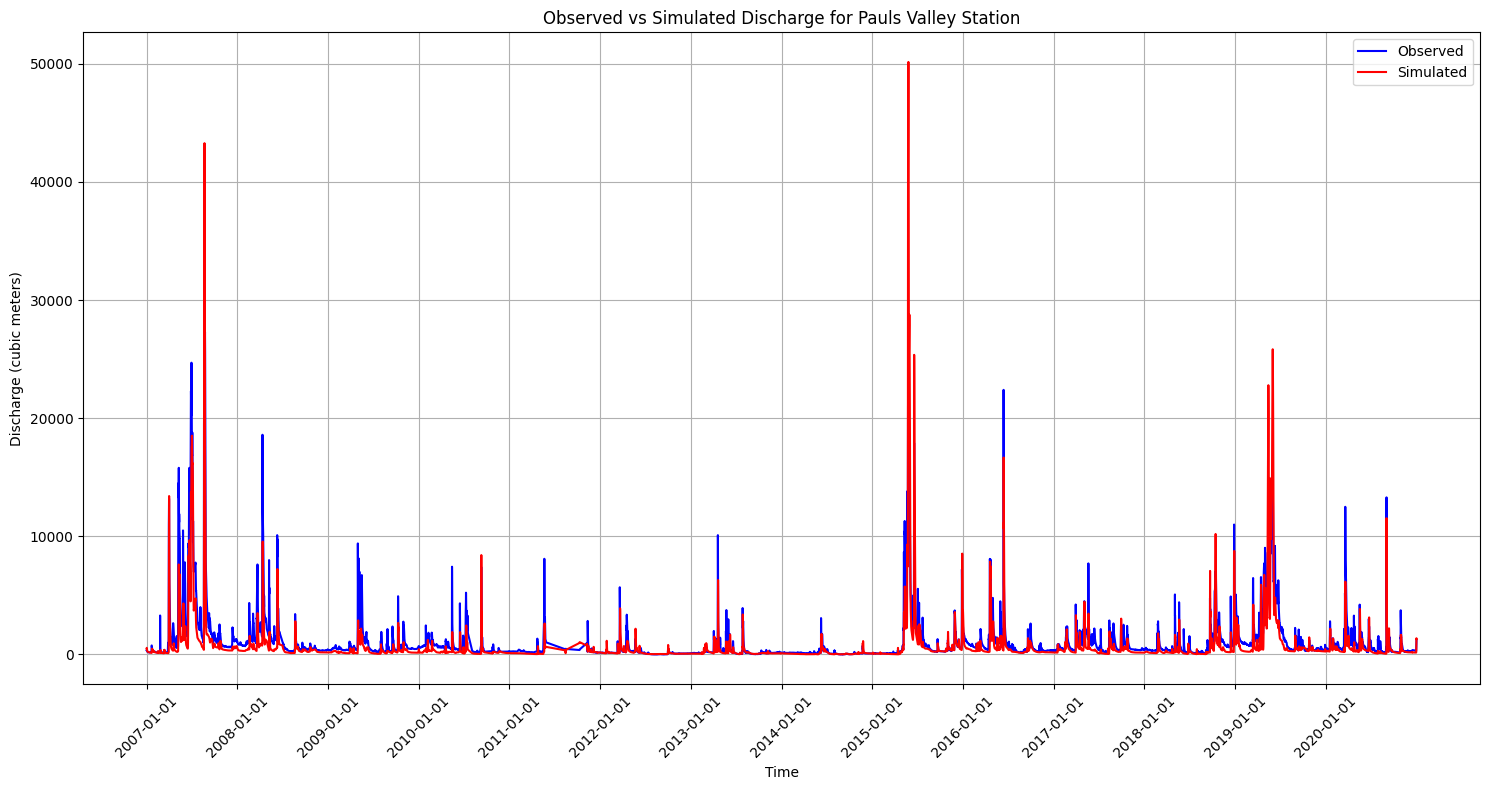

In [ ]:
from plot_utils import plot_observed_vs_simulated_time_series

# Plot observed vs simulated discharge time series for Antlers station
plot_observed_vs_simulated_time_series(df_plvo_merged, df_plvo_merged, 'Antlers')

# Plot observed vs simulated discharge time series for Pauls Valley station
plot_observed_vs_simulated_time_series(df_plvo_merged, df_plvo_merged, 'Pauls Valley')


In [ ]:

# Calculate NSE for Antlers station
nse_antlers = nse_utils.calculate_nse_for_station(df_plvo_merged, df_plvo_merged)

# Calculate NSE for Pauls Valley station
nse_pauls_valley = nse_utils.calculate_nse_for_station(df_plvo_merged, df_plvo_merged)

print("NSE for Antlers station:", nse_antlers)
print("NSE for Pauls Valley station:", nse_pauls_valley)


NSE for Antlers station: 0.6116674437568762
NSE for Pauls Valley station: 0.6116674437568762


In [ ]:
df_plvo_merged['datetime'] = pd.to_datetime(df_plvo_merged['datetime'])
df_plvo_merged['datetime'] = pd.to_datetime(df_plvo_merged['datetime'])


In [ ]:
df_plvo_merged.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
0,USGS,7328500,2007-01-01 06:00:00+00:00,UTC,355.0,A:[91],504
1,USGS,7328500,2007-01-01 12:00:00+00:00,UTC,351.0,A:[91],556
2,USGS,7328500,2007-01-01 18:00:00+00:00,UTC,329.0,A:[91],561
3,USGS,7328500,2007-01-02 00:00:00+00:00,UTC,317.0,A:[91],514
4,USGS,7328500,2007-01-02 06:00:00+00:00,UTC,310.0,A:[91],450


In [ ]:
train_start, train_end = '2007-01-01 06:00:00+00:00', '2015-12-31 18:00:00+00:00'
val_start, val_end = '2016-01-01 00:00:00+00:00', '2018-12-31 18:00:00+00:00'
test_start, test_end = '2019-01-01 00:00:00+00:00', '2020-12-31 18:00:00+00:00'


In [ ]:
train_start = pd.Timestamp(train_start)
train_end = pd.Timestamp(train_end)
val_start = pd.Timestamp(val_start)
val_end = pd.Timestamp(val_end)
test_start = pd.Timestamp(test_start)
test_end = pd.Timestamp(test_end)


In [ ]:
df_anto_train = df_plvo_merged[(df_plvo_merged['datetime'] >= train_start) & (df_plvo_merged['datetime'] <= train_end)]
df_anto_val = df_plvo_merged[(df_plvo_merged['datetime'] >= val_start) & (df_plvo_merged['datetime'] <= val_end)]
df_anto_test = df_plvo_merged[(df_plvo_merged['datetime'] >= test_start) & (df_plvo_merged['datetime'] <= test_end)]


In [ ]:

# Verify lengths of each set
print("Training data length:", len(df_anto_train))
print("Validation data length:", len(df_anto_val))
print("Testing data length:", len(df_anto_test))


Training data length: 10709
Validation data length: 3933
Testing data length: 2765


In [ ]:
df_anto_train

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
0,USGS,7328500,2007-01-01 06:00:00+00:00,UTC,355.0,A:[91],504
1,USGS,7328500,2007-01-01 12:00:00+00:00,UTC,351.0,A:[91],556
2,USGS,7328500,2007-01-01 18:00:00+00:00,UTC,329.0,A:[91],561
3,USGS,7328500,2007-01-02 00:00:00+00:00,UTC,317.0,A:[91],514
4,USGS,7328500,2007-01-02 06:00:00+00:00,UTC,310.0,A:[91],450
...,...,...,...,...,...,...,...
10704,USGS,7328500,2015-12-30 12:00:00+00:00,UTC,3120.0,A,5620
10705,USGS,7328500,2015-12-30 18:00:00+00:00,UTC,3010.0,A,4912
10706,USGS,7328500,2015-12-31 00:00:00+00:00,UTC,2900.0,A,4335
10707,USGS,7328500,2015-12-31 06:00:00+00:00,UTC,2810.0,A,3885


In [ ]:
df_anto_val

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
10709,USGS,7328500,2016-01-01 00:00:00+00:00,UTC,2430.0,A,3710
10710,USGS,7328500,2016-01-01 06:00:00+00:00,UTC,2310.0,A,3764
10711,USGS,7328500,2016-01-01 12:00:00+00:00,UTC,2210.0,A,3697
10712,USGS,7328500,2016-01-01 18:00:00+00:00,UTC,2130.0,A,3539
10713,USGS,7328500,2016-01-02 00:00:00+00:00,UTC,2050.0,A,3333
...,...,...,...,...,...,...,...
14637,USGS,7328500,2018-12-30 18:00:00+00:00,UTC,4860.0,A,2183
14638,USGS,7328500,2018-12-31 00:00:00+00:00,UTC,4740.0,A,1995
14639,USGS,7328500,2018-12-31 06:00:00+00:00,UTC,4450.0,A,2033
14640,USGS,7328500,2018-12-31 12:00:00+00:00,UTC,4300.0,A,2317


In [ ]:
df_anto_test

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
14642,USGS,7328500,2019-01-01 00:00:00+00:00,UTC,4350.0,A,3132
14643,USGS,7328500,2019-01-01 06:00:00+00:00,UTC,4010.0,A,3260
14644,USGS,7328500,2019-01-01 12:00:00+00:00,UTC,3740.0,A,3208
14645,USGS,7328500,2019-01-01 18:00:00+00:00,UTC,3530.0,A,3072
14646,USGS,7328500,2019-01-02 00:00:00+00:00,UTC,3350.0,A,2914
...,...,...,...,...,...,...,...
17402,USGS,7328500,2020-12-30 18:00:00+00:00,UTC,451.0,A:e,294
17403,USGS,7328500,2020-12-31 00:00:00+00:00,UTC,638.0,A:e,728
17404,USGS,7328500,2020-12-31 06:00:00+00:00,UTC,761.0,A:e,1175
17405,USGS,7328500,2020-12-31 12:00:00+00:00,UTC,959.0,A:e,1374


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Extracting the streamflow values as the target variable
streamflow = df_plvo_merged['Sim_Discharge'].values

# Filtering the data for the specified training and testing periods
df_anto_train = df_plvo_merged[(df_plvo_merged['datetime'] >= train_start) & (df_plvo_merged['datetime'] <= train_end)]
df_anto_val = df_plvo_merged[(df_plvo_merged['datetime'] >= val_start) & (df_plvo_merged['datetime'] <= val_end)]
df_anto_test = df_plvo_merged[(df_plvo_merged['datetime'] >= test_start) & (df_plvo_merged['datetime'] <= test_end)]


# Extracting the streamflow values from the training and testing data
train_streamflow = df_anto_train['Sim_Discharge'].values
Val_streamflow = df_anto_val['Sim_Discharge'].values
test_streamflow = df_anto_test['Sim_Discharge'].values

# Normalizing the streamflow data (scaling to values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
train_streamflow = scaler.fit_transform(train_streamflow.reshape(-1, 1))
Val_streamflow = scaler.fit_transform(Val_streamflow.reshape(-1, 1))
test_streamflow = scaler.transform(test_streamflow.reshape(-1, 1))

In [ ]:
# Defining a function to prepare the dataset for LSTM
def prepare_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

#  Defining the number of time steps to consider (30 days because its a monthly data)
n_steps = 30

# Preparing the dataset for training
X_train, y_train = prepare_dataset(train_streamflow, n_steps)

# Preparing the dataset for validation test
X_val, y_val = prepare_dataset(Val_streamflow, n_steps)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


# Defining the LSTM model
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)



Epoch 1/10
334/334 [==============================] - 6s 11ms/step - loss: 9.7922e-04
Epoch 2/10
334/334 [==============================] - 4s 11ms/step - loss: 3.9423e-04
Epoch 3/10
334/334 [==============================] - 4s 12ms/step - loss: 2.4809e-04
Epoch 4/10
334/334 [==============================] - 5s 13ms/step - loss: 1.8134e-04
Epoch 5/10
334/334 [==============================] - 4s 11ms/step - loss: 1.3697e-04
Epoch 6/10
334/334 [==============================] - 4s 11ms/step - loss: 1.2380e-04
Epoch 7/10
334/334 [==============================] - 5s 14ms/step - loss: 1.1182e-04
Epoch 8/10
334/334 [==============================] - 4s 11ms/step - loss: 1.0208e-04
Epoch 9/10
334/334 [==============================] - 4s 11ms/step - loss: 8.1981e-05
Epoch 10/10
334/334 [==============================] - 4s 11ms/step - loss: 8.6074e-05


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_val)

122/122 [==============================] - 1s 5ms/step


In [ ]:
# Inversing transform the predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_val = scaler.inverse_transform(y_val)


# Calculating Nash-Sutcliffe Efficiency (NSE) for evaluation
nse = 1 - (np.sum((y_val - y_pred) ** 2) / np.sum((y_val - np.mean(y_val)) ** 2))
print(f"Nash-Sutcliffe Efficiency (NSE): {nse}")

Nash-Sutcliffe Efficiency (NSE): 0.8968998527181269


In [ ]:
y_pred

array([[ 658.8428 ],
       [ 631.6846 ],
       [ 609.47095],
       ...,
       [1467.6041 ],
       [1556.6713 ],
       [1881.5359 ]], dtype=float32)

In [ ]:
# Assuming you have datetime values for your validation period
validation_dates = df_anto_val['datetime']

# Assuming you have the USGS discharge, simulated discharge, and LSTM predictions
usgs_discharge = df_anto_val['USGS_Discharge']
sim_discharge = df_anto_val['Sim_Discharge']
lstm_predictions = model.predict(X_val)  # Assuming you have X_val and model for LSTM predictions

# Inversing transform the LSTM predictions to the original scale
lstm_predictions = scaler.inverse_transform(lstm_predictions)

122/122 [==============================] - 1s 6ms/step


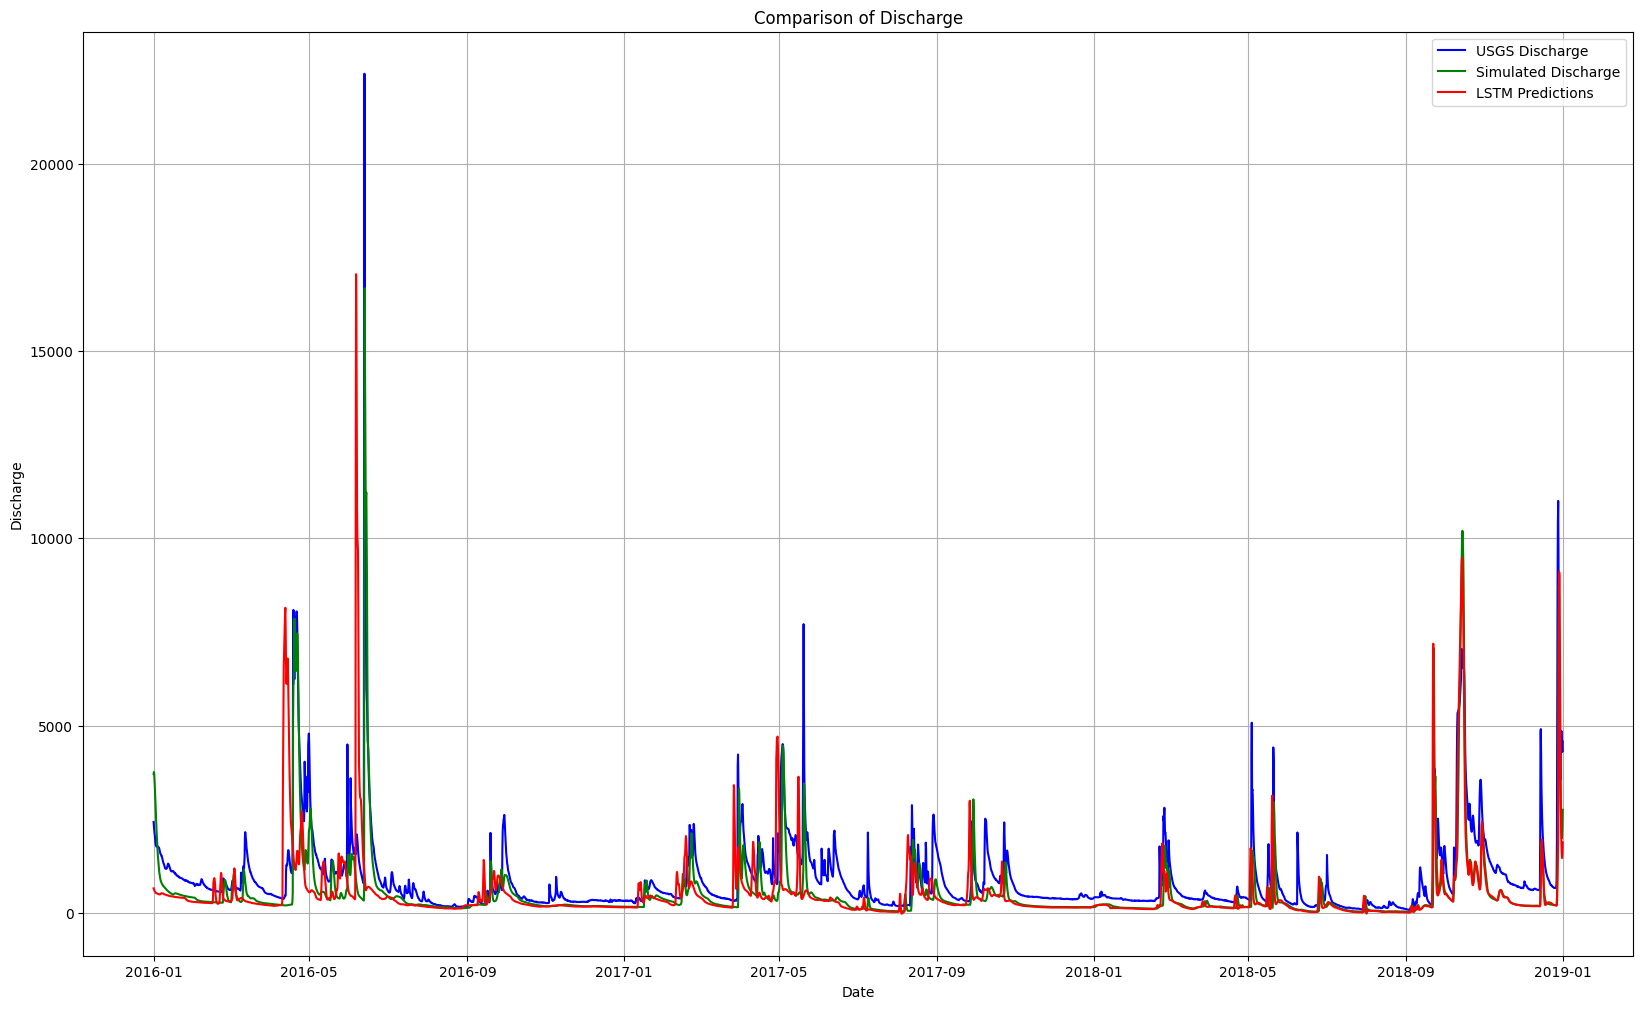

In [ ]:
#import numpy as np
#from scipy.interpolate import interp1d

# Interpolate LSTM predictions to match the length of validation_dates
#interp_func = interp1d(np.arange(len(lstm_predictions)), lstm_predictions.flatten())
#lstm_predictions_interp = interp_func(np.linspace(0, len(lstm_predictions) - 1, len(validation_dates)))

# Plotting
plt.figure(figsize=(20, 12))
plt.plot(validation_dates, usgs_discharge, label='USGS Discharge', color='blue')
plt.plot(validation_dates, sim_discharge, label='Simulated Discharge', color='green')
plt.plot(validation_dates, lstm_predictions_interp, label='LSTM Predictions', color='red')

plt.title('Comparison of Discharge')
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.grid(True)
plt.show()


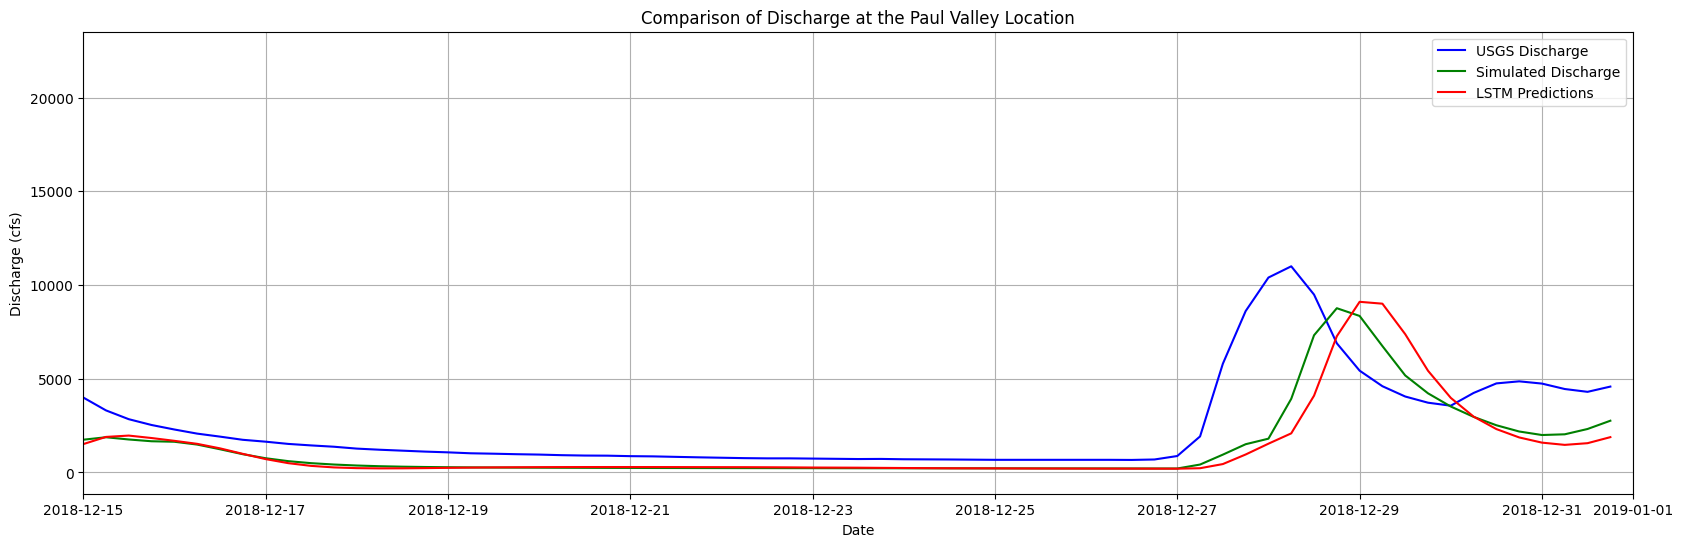

In [ ]:
#import matplotlib.pyplot as plt

# Find the minimum and maximum dates for the year 2018
min_date_2018 = pd.Timestamp('2018-12-15')
max_date_2018 = pd.Timestamp('2019-01-01')

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(validation_dates, usgs_discharge, label='USGS Discharge', color='blue')
plt.plot(validation_dates, sim_discharge, label='Simulated Discharge', color='green')
plt.plot(validation_dates, lstm_predictions_interp, label='LSTM Predictions', color='red')

plt.title('Comparison of Discharge at the Pauls Valley Location')
plt.xlabel('Date')
plt.ylabel('Discharge (cfs)')
plt.legend()
plt.grid(True)

# Set x-axis limits to cover only the year 2018
plt.xlim(min_date_2018, max_date_2018)

plt.show()
